In [2]:
import tensorflow as tf

model = tf.keras.models.load_model('ISL.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 488, 488, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 244, 244, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 242, 242, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 121, 121, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 119, 119, 64)      36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 906304)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [3]:
import imutils
def crop(img):
    img1 = imutils.resize(img,height = 490)
    w = img1.shape[1]
    if w<490:
        img2 = imutils.resize(img,width = 490)
        h = img2.shape[0]
        return img2[int((h-490)/2):int((h+490)/2), 0:490]
    else:
        return img1[0:490, int((w-490)/2):int((w+490)/2)]

In [4]:
from load_model import draw_keypoints
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict(path):
    img = cv2.imread(path)
    img = crop(img)
    inp, img1 = draw_keypoints(img)

    im = np.array([inp])

    classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N','O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

    preds = model.predict(im)[0]
    max = 0
    pred = None
    for i in range(len(preds)):
        if preds[i]>max:
            max = preds[i]
            pred = i
    return classes[pred], img1

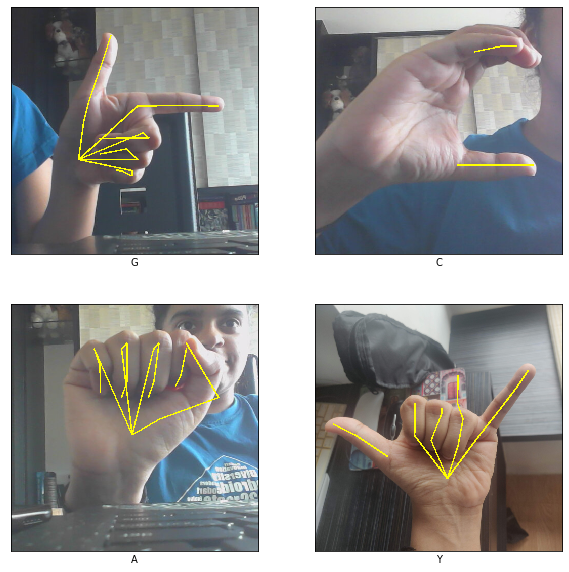

In [5]:
# path = "test_images/data/W/029.jpg"
paths = ["imG.jpg", "imC.jpg", "imA.jpg", "imY1.jpg"]
plt.figure(figsize=(10,10))
for i in range(len(paths)):
    pred, im = predict("test/"+paths[i])
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(im, cmap=plt.cm.binary)
    plt.xlabel(pred)
plt.show()